<a href="https://colab.research.google.com/github/emanuel379/-Introdu-o-Ci-ncia-de-Dados/blob/main/ICD_Atividade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statistics import variance
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import scipy.stats as ss

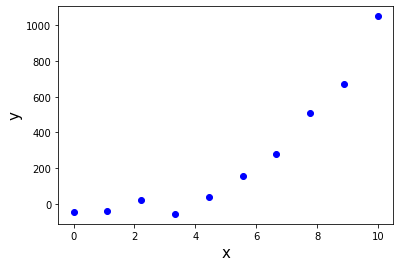

In [ ]:
# 1

N = 10 # Amostra
x = np.linspace(0,10,N)
y = x**3 + np.random.normal(0,50, N)
plt.plot(x,y, 'ro', color = 'blue')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)

plt.show(True)

Estimated coefficients:
b_0 = -243.26917665102366  
b_1 = 100.4297952579641


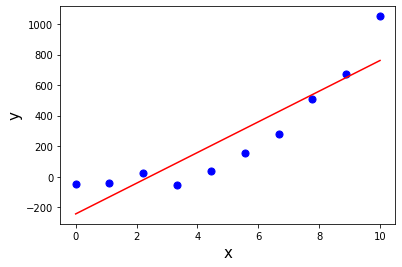

In [ ]:
# Regressão linear

def estimate_coef(x, y):
    # número de observações/pontos
    n = np.size(x)

    # médias de x e y
    mx, my = np.mean(x), np.mean(y)

    # calculating cross-deviation and deviation about x
    #SS_xy = np.sum(y*x) - n*m_y*m_x
    #SS_xx = np.sum(x*x) - n*m_x*m_x
    Sxx = 0 # Variância de x
    Sxy = 0 # Covariância de x, y
    for i in range(0,len(x)):
        Sxy = Sxy + (x[i]-mx)*(y[i]-my)
        Sxx = Sxx + (x[i]-mx)**2

    # calcula os coeficientes de regressão
    b1 = Sxy / Sxx # Beta 1
    b0 = my - b1*mx # Beta 0

    return(b0, b1)

# função para mostrar os dados e o ajuste linear
def plot_regression_line(x, y, b):
    # mostra os dados
    plt.scatter(x, y, color = "b", marker = "o", s = 50)

    # prediz os valores
    y_pred = b[0] + b[1]*x

    # mostra a reta de regressão
    plt.plot(x, y_pred, color = "r")
    plt.xlabel('x', fontsize = 15)
    plt.ylabel('y', fontsize = 15)
    plt.show(True)

# estima os coeficientes
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {}  \nb_1 = {}".format(b[0], b[1]))

# mostra o ajuste linear
plot_regression_line(x, y, b)

In [ ]:
# Calculando o erro padrão residual

#funcao que calcula o RSE
def RSE(x,y,b):
    n = len(y)
    RSE = 0
    for i in range(0,n):
        y_pred = b[0]+ x[i]*b[1] # valor predito
        RSE = RSE + (y[i]-y_pred)**2
    RSE = math.sqrt(RSE/(n-2))
    return RSE
print('RSE:', RSE(x,y,b))

RSE: 169.8427039518019


In [ ]:
def R2(x,y,b):
    n = len(y)
    c1 = 0
    c2 = 0
    ym = np.mean(y)
    for i in range(0,n):
        y_pred = b[0]+ x[i]*b[1] # valor predito
        c1 = c1 + (y[i]-y_pred)**2
        c2 = c2 + (y[i]-ym)**2
    R2 = 1 - c1/c2
    return R2

R2(x, y, b)

0.8165656034529465

In [ ]:
# Regressão polinômial de grau 3

# define a transformação nos dados
transformer = PolynomialFeatures(degree = 3, include_bias=False)
x = x.reshape((-1, 1))
transformer.fit(x)
print('Dados originais:\n', x)

# transforma os dados incluindo uma nova coluna com valores quadráticos
x_ = transformer.transform(x)
print('Novos dados:\n', x_)

Dados originais:
 [[ 0.        ]
 [ 1.11111111]
 [ 2.22222222]
 [ 3.33333333]
 [ 4.44444444]
 [ 5.55555556]
 [ 6.66666667]
 [ 7.77777778]
 [ 8.88888889]
 [10.        ]]
Novos dados:
 [[   0.            0.            0.        ]
 [   1.11111111    1.2345679     1.37174211]
 [   2.22222222    4.9382716    10.9739369 ]
 [   3.33333333   11.11111111   37.03703704]
 [   4.44444444   19.75308642   87.7914952 ]
 [   5.55555556   30.86419753  171.46776406]
 [   6.66666667   44.44444444  296.2962963 ]
 [   7.77777778   60.49382716  470.50754458]
 [   8.88888889   79.01234568  702.33196159]
 [  10.          100.         1000.        ]]


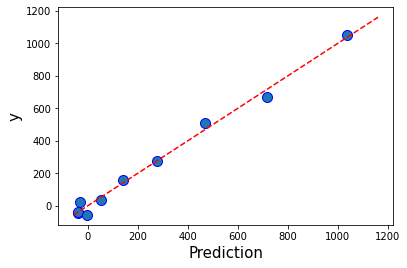

In [ ]:
# Gerando dados para regressão linear com nossos dados linearizados na forma de função polinomial

model = LinearRegression().fit(x_, y)
y_pred = model.predict(x_)

fig = plt.figure()
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

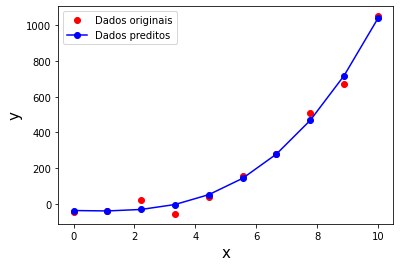

In [ ]:
# Gráfico original da regressão polinomial

plt.plot(x,y, 'ro', label='Dados originais')
plt.plot(x,y_pred, 'bo-', label = 'Dados preditos')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
plt.legend()
plt.show(True)

In [ ]:
# Analisando a adequação do modelo a nossa amostra com o R^2 = (corr(x, y))^2
# Quanto mais próximo de 1, mais bem ajustado

R2 = r2_score(y, y_pred)
print('R2:', R2)

R2: 0.9918753900555265


In [ ]:
# Repetindo o mesmo processo em uma Regressão polinômial de grau 5

# define a transformação nos dados
transformer = PolynomialFeatures(degree = 5, include_bias=False)
x = x.reshape((-1, 1))
transformer.fit(x)
print('Dados originais:\n', x)

# transforma os dados incluindo uma nova coluna com valores quadráticos
x_ = transformer.transform(x)
print('Novos dados:\n', x_)

Dados originais:
 [[ 0.        ]
 [ 1.11111111]
 [ 2.22222222]
 [ 3.33333333]
 [ 4.44444444]
 [ 5.55555556]
 [ 6.66666667]
 [ 7.77777778]
 [ 8.88888889]
 [10.        ]]
Novos dados:
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.11111111e+00 1.23456790e+00 1.37174211e+00 1.52415790e+00
  1.69350878e+00]
 [2.22222222e+00 4.93827160e+00 1.09739369e+01 2.43865264e+01
  5.41922810e+01]
 [3.33333333e+00 1.11111111e+01 3.70370370e+01 1.23456790e+02
  4.11522634e+02]
 [4.44444444e+00 1.97530864e+01 8.77914952e+01 3.90184423e+02
  1.73415299e+03]
 [5.55555556e+00 3.08641975e+01 1.71467764e+02 9.52598689e+02
  5.29221494e+03]
 [6.66666667e+00 4.44444444e+01 2.96296296e+02 1.97530864e+03
  1.31687243e+04]
 [7.77777778e+00 6.04938272e+01 4.70507545e+02 3.65950312e+03
  2.84628021e+04]
 [8.88888889e+00 7.90123457e+01 7.02331962e+02 6.24295077e+03
  5.54928957e+04]
 [1.00000000e+01 1.00000000e+02 1.00000000e+03 1.00000000e+04
  1.00000000e+05]]


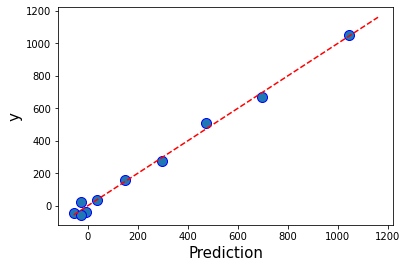

In [ ]:
# Gerando dados para regressão linear com nossos dados linearizados na forma de função polinomial

model = LinearRegression().fit(x_, y)
y_pred = model.predict(x_)

fig = plt.figure()
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

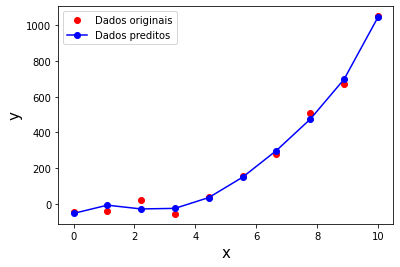

In [ ]:
# Gráfico original da regressão polinomial

plt.plot(x,y, 'ro', label='Dados originais')
plt.plot(x,y_pred, 'bo-', label = 'Dados preditos')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
plt.legend()
plt.show(True)

In [ ]:
# Analisando a adequação do modelo a nossa amostra com o R^2 = (corr(x, y))^2
# Quanto mais próximo de 1, mais bem ajustado

R2 = r2_score(y, y_pred)
print('R2:', R2)

R2: 0.9942397793279116


In [ ]:
# Repetindo o mesmo processo em uma Regressão polinômial de grau 10

# define a transformação nos dados
transformer = PolynomialFeatures(degree = 10, include_bias=False)
x = x.reshape((-1, 1))
transformer.fit(x)
print('Dados originais:\n', x)

# transforma os dados incluindo uma nova coluna com valores quadráticos
x_ = transformer.transform(x)
print('Novos dados:\n', x_)

Dados originais:
 [[ 0.        ]
 [ 1.11111111]
 [ 2.22222222]
 [ 3.33333333]
 [ 4.44444444]
 [ 5.55555556]
 [ 6.66666667]
 [ 7.77777778]
 [ 8.88888889]
 [10.        ]]
Novos dados:
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.11111111e+00 1.23456790e+00 1.37174211e+00 1.52415790e+00
  1.69350878e+00 1.88167642e+00 2.09075158e+00 2.32305731e+00
  2.58117479e+00 2.86797199e+00]
 [2.22222222e+00 4.93827160e+00 1.09739369e+01 2.43865264e+01
  5.41922810e+01 1.20427291e+02 2.67616202e+02 5.94702672e+02
  1.32156149e+03 2.93680332e+03]
 [3.33333333e+00 1.11111111e+01 3.70370370e+01 1.23456790e+02
  4.11522634e+02 1.37174211e+03 4.57247371e+03 1.52415790e+04
  5.08052634e+04 1.69350878e+05]
 [4.44444444e+00 1.97530864e+01 8.77914952e+01 3.90184423e+02
  1.73415299e+03 7.70734663e+03 3.42548739e+04 1.52243884e+05
  6.76639485e+05 3.00728660e+06]
 [5.55555556e+00 3.08641975e+01 

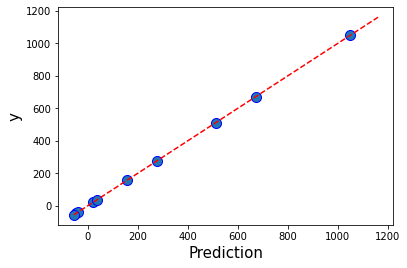

In [ ]:
# Gerando dados para regressão linear com nossos dados linearizados na forma de função polinomial

model = LinearRegression().fit(x_, y)
y_pred = model.predict(x_)

fig = plt.figure()
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

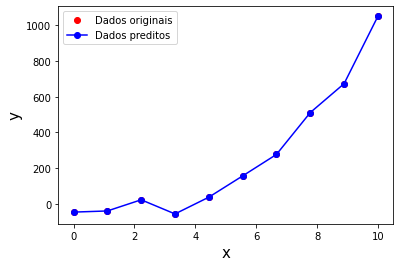

In [ ]:
# Gráfico original da regressão polinomial

plt.plot(x,y, 'ro', label='Dados originais')
plt.plot(x,y_pred, 'bo-', label = 'Dados preditos')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
plt.legend()
plt.show(True)

In [ ]:
# Analisando a adequação do modelo a nossa amostra com o R^2 = (corr(x, y))^2
# Quanto mais próximo de 1, mais bem ajustado

R2 = r2_score(y, y_pred)
print('R2:', R2)

R2: 0.9999999999996726


In [ ]:
# 2


from zipfile import ZipFile
file_name = 'data (4).zip'
with ZipFile(file_name, 'r') as zip:

    zip.printdir()


    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')


File Name                                             Modified             Size
data/                                          2020-11-16 23:34:20            0
__MACOSX/._data                                2020-11-16 23:34:20          177
data/houses_to_rent.csv                        2020-03-15 01:12:22       471498
__MACOSX/data/._houses_to_rent.csv             2020-03-15 01:12:22          426
data/Advertising.csv                           2019-09-26 05:11:42         4756
__MACOSX/data/._Advertising.csv                2019-09-26 05:11:42          426
data/breastcancer_test.csv                     2018-03-24 16:58:30         4762
__MACOSX/data/._breastcancer_test.csv          2018-03-24 16:58:30          389
data/.DS_Store                                 2020-11-16 23:34:52         6148
__MACOSX/data/._.DS_Store                      2020-11-16 23:34:52          120
data/breastcancer_training.csv                 2018-03-24 16:58:30         7892
__MACOSX/data/._breastcancer_training.cs

In [ ]:
df =  pd.read_csv('data/BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


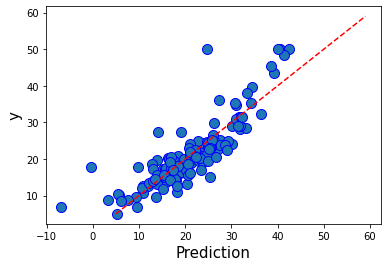

In [ ]:
data = df.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

# divide o conjunto em treinamento e teste
p = 0.3 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)
# salva a figura em um arquivo
fig.savefig('regression-LR.jpg')

In [ ]:
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.7112260057484974


In [ ]:
# Inferência sobre os parâmetros
# H0: não há relação entre x e y
# H1: existe relação entre x e y

ylabel = df.columns[-1]

# monta o modelo: y ~ x1 + x2 + ...
model_string =  df.columns[0]
features = df.columns[1:-1]
for s in features:
    model_string = model_string + '+' + s
model_string = df.columns[-1] + '~' + model_string
print('Modelo as ser ajustado: ', model_string)

model = ols(model_string, df).fit()
print(model.summary())

Modelo as ser ajustado:  medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+b+lstat
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 20 Jan 2023   Prob (F-statistic):          6.72e-135
Time:                        01:48:30   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

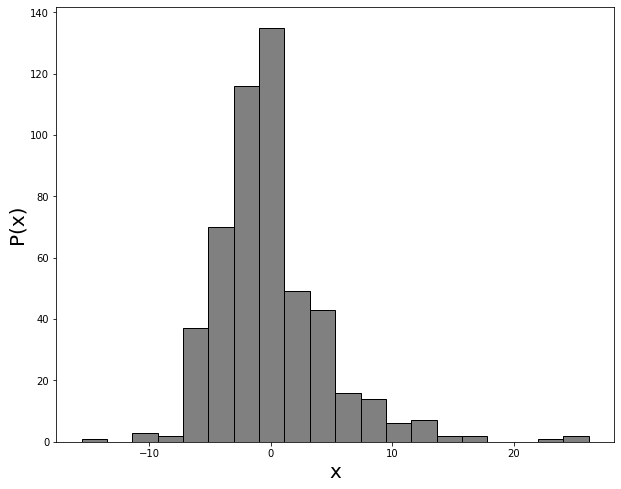

In [ ]:
plt.figure(figsize=(10,8))
residuals = model.resid

plt.hist(residuals, bins=20, color = 'gray', histtype='bar', ec='black')
plt.xlabel('x', fontsize = 20)
plt.ylabel('P(x)',fontsize = 20)
plt.show(True)

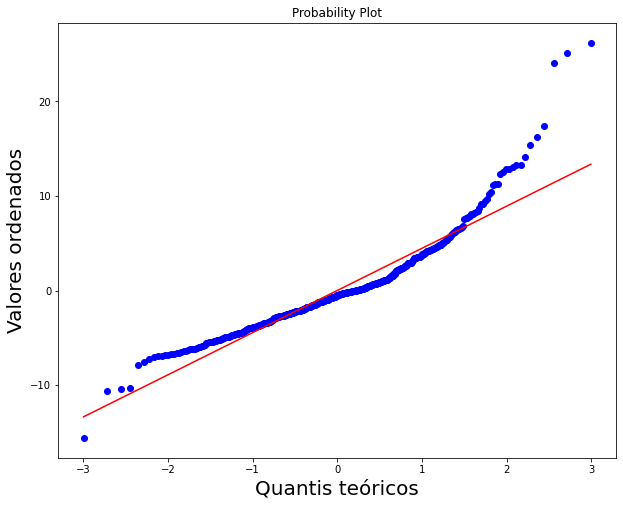

In [ ]:
plt.figure(figsize=(10,8))
ss.probplot(np.sort(residuals), dist="norm",plot=plt)

plt.xlabel('Quantis teóricos', fontsize = 20)
plt.ylabel('Valores ordenados',fontsize = 20)
plt.savefig('QQ.svg')
plt.show(True)

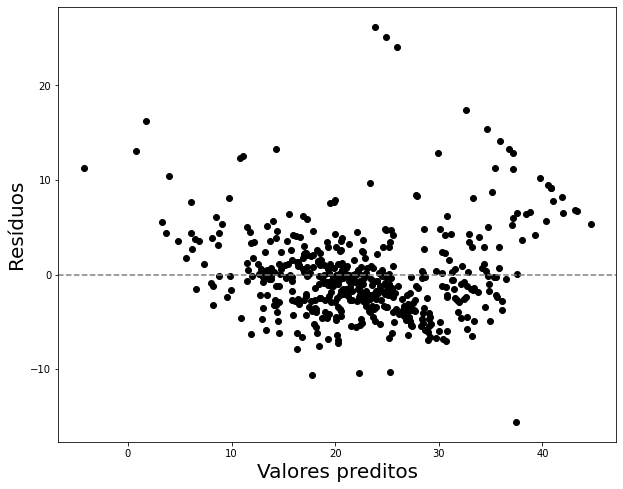

In [ ]:
# Resíduos

plt.figure(figsize=(10,8))

plt.scatter(model.fittedvalues, residuals,color='black')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.xlabel('Valores preditos',fontsize = 20)
plt.ylabel('Resíduos', fontsize = 20)
plt.savefig('residuos-diagnosis.svg')
plt.show(True)
plt.show(True)

In [ ]:
# 3

df = pd.read_csv('data/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


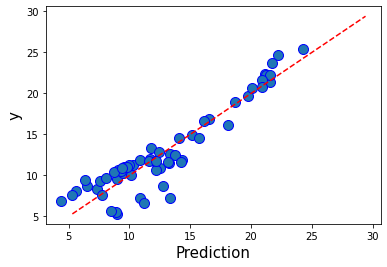

In [ ]:
data = df.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

# divide o conjunto em treinamento e teste
p = 0.3 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)
# salva a figura em um arquivo
fig.savefig('regression-LR.jpg')

In [ ]:
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.8609155416329135


In [ ]:
# Eliminando coluna desnecessária

data = df.drop(df.columns[[0]], axis = 1)
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


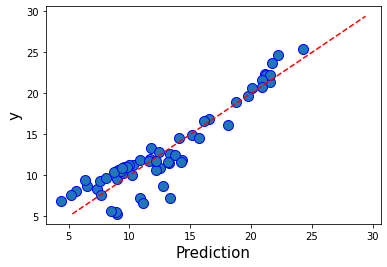

In [ ]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

# divide o conjunto em treinamento e teste
p = 0.3 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)
# salva a figura em um arquivo
fig.savefig('regression-LR.jpg')

In [ ]:
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.8609466508230367


In [ ]:
# Inferência sobre os parâmetros
# H0: não há relação entre x e y
# H1: existe relação entre x e y

ylabel = df.columns[-1]

# monta o modelo: y ~ x1 + x2 + ...
model_string =  df.columns[0]
features = df.columns[1:-1]
for s in features:
    model_string = model_string + '+' + s
model_string = df.columns[-1] + '~' + model_string
print('Modelo as ser ajustado: ', model_string)

model = ols(model_string, df).fit()
print(model.summary())

Modelo as ser ajustado:  sales~Unnamed: 0+TV+radio+newspaper
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           1.58e-96
Time:                        01:48:32   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

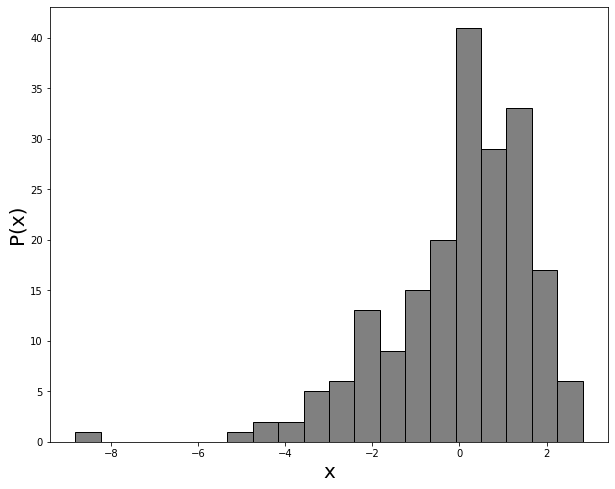

In [ ]:
plt.figure(figsize=(10,8))
residuals = model.resid

plt.hist(residuals, bins=20, color = 'gray', histtype='bar', ec='black')
plt.xlabel('x', fontsize = 20)
plt.ylabel('P(x)',fontsize = 20)
plt.show(True)

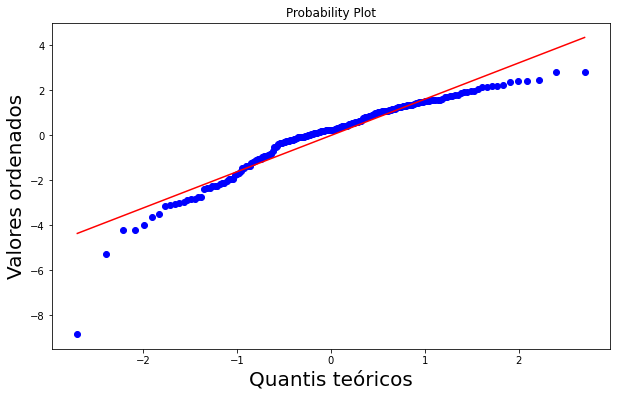

In [ ]:
plt.figure(figsize=(10,6))
ss.probplot(np.sort(residuals), dist="norm",plot=plt)

plt.xlabel('Quantis teóricos', fontsize = 20)
plt.ylabel('Valores ordenados',fontsize = 20)
plt.savefig('QQ.svg')
plt.show(True)

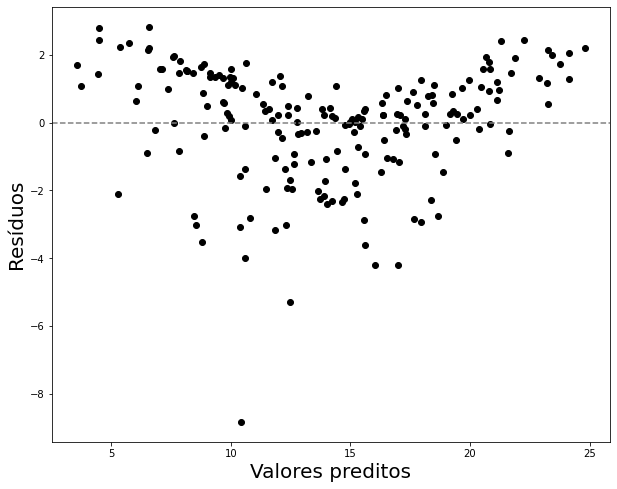

In [ ]:
# Resíduos

plt.figure(figsize=(10,8))

plt.scatter(model.fittedvalues, residuals,color='black')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.xlabel('Valores preditos',fontsize = 20)
plt.ylabel('Resíduos', fontsize = 20)
plt.savefig('residuos-diagnosis.svg')
plt.show(True)
plt.show(True)